In [1]:
import pandas as pd
import numpy as np
import nltk
import string

In [2]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
wnl = WordNetLemmatizer()

In [3]:
df = pd.read_csv("restaurant.csv")

In [4]:
df.head()

,review,sentiment
0,This is an old-dark-house movie. A young coupl...,0
1,I recently watched Spirit and enjoyed it very ...,1
2,Touching; Well directed autobiography of a tal...,1
3,"Luckily I did not pay to see this movie. Also,...",0
4,"Yes, it feels, and for the most part plays lik...",1


In [5]:
df.shape

(50000, 2)

In [6]:
df.drop(df.index[range(30000,49999)] , inplace =True)

In [7]:
df.index = range(len(df))

In [8]:
df.head()

,review,sentiment
0,This is an old-dark-house movie. A young coupl...,0
1,I recently watched Spirit and enjoyed it very ...,1
2,Touching; Well directed autobiography of a tal...,1
3,"Luckily I did not pay to see this movie. Also,...",0
4,"Yes, it feels, and for the most part plays lik...",1


In [9]:
df.review[0]

'This is an old-dark-house movie. A young couple creep around a weird mansion said to be run by Satan, where they run from and into one after another of an ill-assorted crew: a lady in distress, an ape, an ape-man, a midget, various odd-looking people, and (for some reason) two Chinese. They end up in a throne room where the hero is required to play a "Price Is Right" sort of contest involving a climb up seven steps with seven illuminated footprints; hence the title. For my taste it\\\'s too much of the same thing. The creeping around fun-house corridors is amusing for a while, then becomes repetitive. By comparison with Harold Lloyd or Buster Keaton or Laurel and Hardy doing the same bit in two reels, it isn\\\'t truly funny. It\\\'s not frightening either, and apparently wasn\\\'t intended to be: the household is too absurd. Most films in this genre balance the comedy with a genuine threat, and usually two--one that the characters are led to believe is real, and another for which it\

In [10]:
df.tail()

,review,sentiment
29996,This movie was hysterical. I haven\'t laughed ...,1
29997,This movie is horrendous. Decent fight scenes ...,0
29998,What happens when someone has so much social a...,1
29999,This film is a bad film but to gain any nutrit...,0
30000,I don\'t want to bore everyone by reiterating ...,1


In [11]:
from nltk.corpus import stopwords

In [12]:
stopword = stopwords.words('english')

In [13]:
def rem_stopword(x):
    word = word_tokenize(x)
    words = [i for i in word if i not in stopword]
    text = " ".join(words)
    return(text)

In [14]:
df['review'] = df['review'].apply(rem_stopword)
df

,review,sentiment
0,This old-dark-house movie . A young couple cre...,0
1,"I recently watched Spirit enjoyed much , I 've...",1
2,Touching ; Well directed autobiography talente...,1
3,"Luckily I pay see movie . Also , I even reveal...",0
4,"Yes , feels , part plays like `` school specia...",1
5,"This like watching trailer coming movie , exce...",0
6,"It started slow excellent animated intro , dir...",1
7,It seems two kinds people world : think `` Fiv...,1
8,This first sci fi series I seriously become ho...,1
9,Things `` news '' taken given shocking documen...,1


In [15]:
punctuation = string.punctuation

In [16]:
def rem_punctu(x):
    word = word_tokenize(x)
    words = [i for i in word if i not in punctuation]
    text = " ".join(words)
    return(text)

In [17]:
df['review'] = df['review'].apply(rem_punctu)

In [18]:
df.head()

,review,sentiment
0,This old-dark-house movie A young couple creep...,0
1,I recently watched Spirit enjoyed much I 've s...,1
2,Touching Well directed autobiography talented ...,1
3,Luckily I pay see movie Also I even reveal spo...,0
4,Yes feels part plays like `` school special ``...,1


In [19]:
df.review[0]

"This old-dark-house movie A young couple creep around weird mansion said run Satan run one another ill-assorted crew lady distress ape ape-man midget various odd-looking people reason two Chinese They end throne room hero required play `` Price Is Right `` sort contest involving climb seven steps seven illuminated footprints hence title For taste it\\ 's much thing The creeping around fun-house corridors amusing becomes repetitive By comparison Harold Lloyd Buster Keaton Laurel Hardy bit two reels isn\\'t truly funny It\\ 's frightening either apparently wasn\\'t intended household absurd Most films genre balance comedy genuine threat usually two -- one characters led believe real another it\\ 's cover Here cover isn\\'t taken seriously neither covered A moments fun emerge mix it\\ 's rather heavy fun The novel film based straight thriller I think could played straight better effect -- still could"

In [20]:
def lemmatizer(x):
    list1 = word_tokenize(x)
    list2 = [wnl.lemmatize(i) for i in list1]
    text = " ".join(list2)
    return text

In [21]:
df['review'] = df['review'].apply(lemmatizer)
df.head()

,review,sentiment
0,This old-dark-house movie A young couple creep...,0
1,I recently watched Spirit enjoyed much I 've s...,1
2,Touching Well directed autobiography talented ...,1
3,Luckily I pay see movie Also I even reveal spo...,0
4,Yes feel part play like `` school special `` s...,1


In [22]:
df.review[0]

"This old-dark-house movie A young couple creep around weird mansion said run Satan run one another ill-assorted crew lady distress ape ape-man midget various odd-looking people reason two Chinese They end throne room hero required play `` Price Is Right `` sort contest involving climb seven step seven illuminated footprint hence title For taste it\\ 's much thing The creeping around fun-house corridor amusing becomes repetitive By comparison Harold Lloyd Buster Keaton Laurel Hardy bit two reel isn\\'t truly funny It\\ 's frightening either apparently wasn\\'t intended household absurd Most film genre balance comedy genuine threat usually two -- one character led believe real another it\\ 's cover Here cover isn\\'t taken seriously neither covered A moment fun emerge mix it\\ 's rather heavy fun The novel film based straight thriller I think could played straight better effect -- still could"

# machine learning model

In [61]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [62]:
x = df['review']
y = df['sentiment']

In [63]:
print(x.shape)
print(y.shape)

(30001,)
(30001,)


In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size=0.3 , random_state = 40)

In [65]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [66]:
model.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [67]:
model.predict(xtest)[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [68]:
ytest[:10]

28479    1
3956     0
7014     1
18659    0
15274    1
18469    0
8769     1
7222     0
3520     1
16222    1
Name: sentiment, dtype: int64

In [69]:
text = [
    "Okay, there are a ton of reviews here, what can I possibly add?<br /><br />I will try anyway. <br /><br />The reason this is my favorite Scrooge is because of EVERYthing. The sets, outdoor locations, costumes are so beautiful and authentic. The music is sweet. The supporting cast is very well done. One of my favorites is the narrator & nephew, played by Roger Rees. His understated sincerity is touching and his voice is the sound of Christmas to me. David Warner is also a totally believable Bob Cratchit. His is a difficult life, but he remains positive and dignified. <br /><br />The best part of course- is George C. Scott as Ebenezer Scrooge. Some have said his portrayal too gruff. I couldn\'t disagree more. His exchanges at the beginning while cold or harsh, weren\'t out of character. He is a terribly disillusioned man who\'s heart has been hardened by the vicissitudes of life and his own lust for wealth. <br /><br />During the flashbacks, it\'s obvious that he isn\'t all gruff. This is where we see that there is hope for him. If he was totally gone, his partner Marley would never have come for his sake in the first place. And after all, we are none of us past hoping. I think that is a HUGE part of what Dickens was trying to say. When Scrooge looks in on his dance at his employer\'s with Belle, you see him smile regretfully as he tells Belle in the flashback that he will go through life 'with a grin on my face.' Clive Donner was smart enough as the director to allow these moments on film. Sometimes they get left on the editing room floor.<br /><br />And finally, his conversion is so absolutely full of joy that it makes me cry tears of joy EVERY time I see it. His apology to his nephew Fred, so sincere, so moving, it is the spirit not only of Christmas, but of humanity itself. The joy he brings to Fred, to his wife are so apparent. And the line that gets me every time, 'God forgive me for the time I\'ve wasted.' <br /><br />Bravi tutti!"]

In [70]:
model.predict(text)

array([1], dtype=int64)

In [74]:
model.score(xtest,ytest)

0.8602377513609599

## testing on other 20000 data

In [102]:
df1 = pd.read_csv("restaurant.csv")
df.head()

,review,sentiment
0,This old-dark-house movie A young couple creep...,0
1,I recently watched Spirit enjoyed much I 've s...,1
2,Touching Well directed autobiography talented ...,1
3,Luckily I pay see movie Also I even reveal spo...,0
4,Yes feel part play like `` school special `` s...,1


In [103]:
df1.drop(df.index[range(0,30001)],inplace = True)

In [104]:
df1.head()

,review,sentiment
30001,This film contains more action before the open...,1
30002,Imagine you have just been on a plane for 18 h...,1
30003,The 3rd and in my view the best of the Blackad...,1
30004,The Beguiled is a pretty satisfying film for t...,1
30005,"Michael Myers, the deranged, not-so-young-anym...",0


In [105]:
test = df1['review']

In [106]:
real = df1['sentiment']

In [110]:
predict = model.predict(test)
predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [111]:
model.score(test,real)

0.7858892944647232

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(real,predict)

array([[9601,  435],
       [3847, 6116]], dtype=int64)

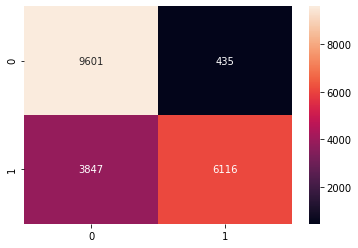

In [114]:
import seaborn as sns
sns.heatmap(confusion_matrix(real,predict),fmt='d',annot=True,
            xticklabels=[0,1],yticklabels=[0,1])

In [115]:
acurracy = (9601+6116)/(9601+6116+435+3847)
acurracy

0.7858892944647232

In [98]:
9601+6116+435+3847

19999

### cleaning 20000 data and than testing

In [89]:
def rem_stopwords(x):
    word = word_tokenize(x)
    words = [wnl.lemmatize(i) for i in word if i not in stopword]
    text = " ".join(words)
    return(text)

In [90]:
df1['review'] = df1['review'].apply(rem_stopwords)
df1.head()

,review,sentiment
30001,This film contains action opening credit entir...,1
30002,Imagine plane 18 hour . You business trip Sout...,1
30003,The 3rd view best Blackadder series. < br / > ...,1
30004,The Beguiled pretty satisfying film thing . Fo...,1
30005,"Michael Myers , deranged , not-so-young-anymor...",0


In [91]:
def rem_punctu(x):
    word = word_tokenize(x)
    words = [i for i in word if i not in punctuation]
    text = " ".join(words)
    return(text)

In [92]:
df1['review']= df1['review'].apply(rem_punctu)
df1.head()

,review,sentiment
30001,This film contains action opening credit entir...,1
30002,Imagine plane 18 hour You business trip South ...,1
30003,The 3rd view best Blackadder series br br The ...,1
30004,The Beguiled pretty satisfying film thing For ...,1
30005,Michael Myers deranged not-so-young-anymore ps...,0


In [93]:
model.predict(df1['review'])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [96]:
predict1 = model.predict(df1['review'])

In [95]:
model.score(df1['review'],df1['sentiment'])

0.8615930796539827

In [97]:
confusion_matrix(df1['sentiment'],predict1)

array([[8793, 1243],
       [1525, 8438]], dtype=int64)

In [100]:
(8793+8438)/(8793+1243+1525+8438)

0.8615930796539827